# Introdução a Modulação Digital com Áudio

### Aluno: Caio Cesar Vieira Cavalcanti - 123110825

> Disclaimer: o uso de IA (Inteligência Artificial) foi de grande importância para entender com mais detalhes os códigos e a retirar dúvidas sobre o assunto
e eventuais erros que acometeram durante o desenvolver do laboratório. Além da geração e correção de funções auxiliares em Python e o uso das demais bibliotecas

⚠️ Esse codigo não funciona em maquinas virtuais ou no WSL


Sobre esse Laboratório:

- [Setup](#setup)
- [Parametros e Bibliotecas](#parametros-de-configurações)
- [Funções e Metodos](#funções)
- [O Laboratório](#o-laboratório)
    1. [Etapa 1: Compreendendo com a Codificação/Modulação de dados](#etapa-1-compreendendo-com-a-codificaçãomodulação-de-dados)
    1. [Etapa 2: Decodificação](#etapa-2-decodificação)
    1. [Etapa 3: Impacto do Ruído na Comunicação](#etapa-3-impacto-do-ruído-na-comunicação)
    1. [Etapa 4: Decodificação no mundo real](#etapa-4-decodificação-no-mundo-real)



## Setup

⚠️ **Atenção** : Execute o código abaixo **apenas uma vez** para realizar a configuração inicial do ambiente.

In [1]:
%pip install numpy matplotlib soundfile sounddevice scipy

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


escolhendo a saida e entrada de audio

In [2]:
import os

import sounddevice as sd
import numpy as np
from scipy.io import wavfile

O comando `sd.query_devices()` listará todas as **entradas** e **saídas** de áudio disponíveis no seu computador. 

A partir dessa lista, identifique qual é a sua **entrada** (microfone) e **saída** (alto-falante) de áudio desejada e atribua esses valores às variáveis `input_device` e `output_device`, respectivamente. Por exemplo,

```
   5 LG ULTRAWIDE (HD Audio Driver f, MME (0 in, 2 out)
   6 Alto-falantes (3- Realtek(R) Au, MME (0 in, 2 out)
>  7 Driver de captura de som primário, Windows DirectSound (2 in, 0 out)
   8 Grupo de microfones (3- Tecnologia Intel® Smart Sound para microfones digitais), Windows DirectSound (2 in, 0 out)
   9 Headset (QCY MeloBuds Pro), Windows DirectSound (1 in, 0 out)
< 10 Driver de som primário, Windows DirectSound (0 in, 2 out)
  11 Fones de ouvido (QCY MeloBuds Pro), Windows DirectSound (0 in, 8 out)
  12 LG ULTRAWIDE (HD Audio Driver for Display Audio), Windows DirectSound (0 in, 2 out)
```

Para que o laboratorio funcione adequamente no meu computador devo escolher opcoes 7 , 10.

In [3]:
sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone (High Definition Aud, MME (2 in, 0 out)
   2 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  3 Alto-falantes (High Definition , MME (0 in, 2 out)
   4 24G2W1G4 (NVIDIA High Definitio, MME (0 in, 2 out)
   5 Digital Audio (S/PDIF) (High De, MME (0 in, 2 out)
   6 Driver de captura de som primário, Windows DirectSound (2 in, 0 out)
   7 Microphone (High Definition Audio Device), Windows DirectSound (2 in, 0 out)
   8 Driver de som primário, Windows DirectSound (0 in, 2 out)
   9 Alto-falantes (High Definition Audio Device), Windows DirectSound (0 in, 2 out)
  10 24G2W1G4 (NVIDIA High Definition Audio), Windows DirectSound (0 in, 2 out)
  11 Digital Audio (S/PDIF) (High Definition Audio Device), Windows DirectSound (0 in, 2 out)
  12 24G2W1G4 (NVIDIA High Definition Audio), Windows WASAPI (0 in, 2 out)
  13 Digital Audio (S/PDIF) (High Definition Audio Device), Windows WASAPI (0 in, 2 out)
  14 Alto-falantes (Hig

In [4]:
output_device = 3 # Alto-falantes
input_device = 1
sd.default.device = (input_device, output_device)

🎯 Execute o código abaixo para gravar um áudio de 3 segundos e, em seguida, reproduzi-lo.

Caso a gravação ou reprodução não funcione corretamente, ajuste os valores das variáveis `input_device` (dispositivo de entrada) e `output_device` (dispositivo de saída) até que o código funcione como esperado.

In [5]:
DURATION = 3  # duraçao em segundos
SAMPLE_RATE = 44100  # Hz
FILENAME = "captura.wav"

audio = sd.rec(int(DURATION * SAMPLE_RATE), samplerate=SAMPLE_RATE, channels=1, dtype='float32')
sd.wait()
print("Gravação finalizada.")

# Salvando arquivo de audio temporario
max_val = np.max(np.abs(audio))
if max_val > 0:
    scaled = audio / max_val
else:
    scaled = audio
wav_data = np.int16(scaled * 32767)
wavfile.write(FILENAME, SAMPLE_RATE, wav_data)
print(f"Áudio salvo em {FILENAME}")

# Reproduz o áudio salvo
fs, data = wavfile.read(FILENAME)
sd.play(data, fs)
sd.wait()
os.remove(FILENAME)
print('Se você escutou o audio tudo seu sistema está configurado corretamente!')

Gravação finalizada.
Áudio salvo em captura.wav
Se você escutou o audio tudo seu sistema está configurado corretamente!


## Parametros de configurações

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
from scipy import signal
import time

parametros de codificação

In [7]:
##
## configuracoes do audio (detalhes na secção de setup)
##

# output_device = 10
# input_device = 7
output_device = 3
input_device = 1
sd.default.device = (input_device, output_device)

##
## Configurações globais do exercio
##
SAMPLE_RATE = 44100  # Taxa de amostragem do audio
BIT_DURATION = 1.0   # 1 segundo por bit
FREQ_LOW = 440       # bit '0' (Lá)
FREQ_HIGH = 880      # bit '1' (Lá oitava)

## Funções

Nessa secao vocês encontraram as funcoes utilizadas

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
from scipy import signal
import time

### Gerador de tom & visualizacao

In [9]:
def generate_tone(frequency, duration, sample_rate=SAMPLE_RATE):
    """
    Gera um tom senoidal
    
    Args:
        frequency: Frequência em Hz
        duration: Duração em segundos
        sample_rate: Taxa de amostragem
    
    Returns:
        array: Sinal de áudio
    """
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    # Aplica janela para suavizar transições
    tone = np.sin(2 * np.pi * frequency * t)
    # Janela de Hanning para evitar cliques
    window = np.hanning(len(tone))
    return tone * window

In [10]:
def show(data:str,debug):
    if debug==True:
        print(data)

In [11]:
def plot_signal(audio_signal, title, num_bits):
    time_axis = np.linspace(0, len(audio_signal)/SAMPLE_RATE, len(audio_signal))
    
    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, audio_signal)
    plt.title(title)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    
    for i in range(1, num_bits): #divisões dos bits
        plt.axvline(x=i*BIT_DURATION, color='red', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

### Codificadores

In [12]:
def encode_nrz(data_bits,debug=False):
    """
    Codifica dados usando NRZ
    
    Args:
        data_bits: string de bits (ex: "10110")
    
    Returns:
        array: Sinal de áudio codificado
    """
    audio_signal = np.array([])
    
    show(f"Codificando NRZ: {data_bits}",debug)
    
    for i, bit in enumerate(data_bits):
        if bit == '1':
            freq = FREQ_HIGH
            show(f"Bit {i}: '1' -> {freq} Hz",debug)
        else:
            freq = FREQ_LOW
            show(f"Bit {i}: '0' -> {freq} Hz",debug)
        
        tone = generate_tone(freq, BIT_DURATION)
        audio_signal = np.concatenate([audio_signal, tone])
    
    return audio_signal

In [13]:
def encode_nrzi(data_bits,debug=False):
    """
    Codifica dados usando NRZI
    
    Args:
        data_bits: string de bits
    
    Returns:
        array: Sinal de áudio codificado
    """
    pass
    
    return '0'

In [14]:
def encode_manchester(data_bits,debug=False):
    """
    Codifica dados usando Manchester
    
    Args:
        data_bits: string de bits
    
    Returns:
        array: Sinal de áudio codificado
    """
    audio_signal = np.array([])
    
    show(f"Codificando Manchester: {data_bits}",debug)
    
    for i, bit in enumerate(data_bits):
        if bit == '1':
            # Bit '1': alto->baixo (primeira metade alta, segunda baixa)
            tone1 = generate_tone(FREQ_HIGH, BIT_DURATION/2)
            tone2 = generate_tone(FREQ_LOW, BIT_DURATION/2)
            show(f"Bit {i}: '1' -> {FREQ_HIGH}Hz -> {FREQ_LOW}Hz",debug)
        else:
            # Bit '0': baixo->alto (primeira metade baixa, segunda alta)
            tone1 = generate_tone(FREQ_LOW, BIT_DURATION/2)
            tone2 = generate_tone(FREQ_HIGH, BIT_DURATION/2)
            show(f"Bit {i}: '0' -> {FREQ_LOW}Hz -> {FREQ_HIGH}Hz",debug)
        
        bit_signal = np.concatenate([tone1, tone2])
        audio_signal = np.concatenate([audio_signal, bit_signal])
    
    return audio_signal

### Decodificadores

#### Detector de frequência

Neste trecho de código, vamos utilizar a **Transformada Rápida de Fourier (FFT)** para detectar frequências dominantes em segmentos de áudio — uma ferramenta para análise espectral de sinais. Utilizamos esse conceito em sala de aula para ilustrar o conceito de **modulação por divisão de frequência (FDM)**. Esse codigos detectaram os bits `0` e `1` em razão das fequências que estabelessemos. 

A função `detect_frequency` tem como objetivo identificar as frequências que compõem um sinal de áudio modulado. Na Figura 1, vemos duas senoides (uma azul e uma vermelha), representando frequências distintas associadas aos bits `'0'` e `'1'`. Essas senoides são combinadas para formar o sinal apresentado na Figura 2, o qual será analisado.


| Figura 1 | Figura 2 | 
| :-:   | :-: |
| 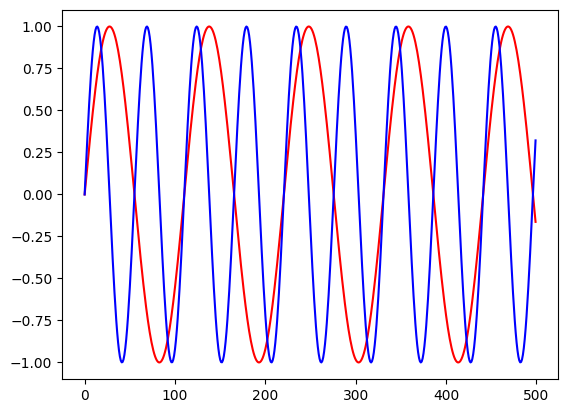 | 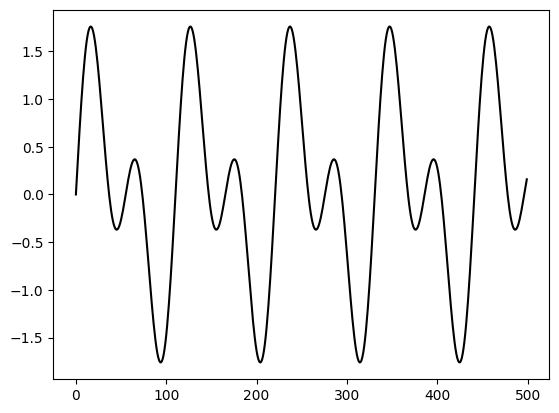 |

O código utiliza a FFT para detectar os picos de frequência presentes no sinal composto. Esses picos — visíveis no gráfico espectral gerado pela FFT (Figura 3) — correspondem exatamente às componentes originais da modulação, permitindo que cada segmento de áudio seja interpretado como `'0'` ou `'1'` com base em qual frequência está presente.

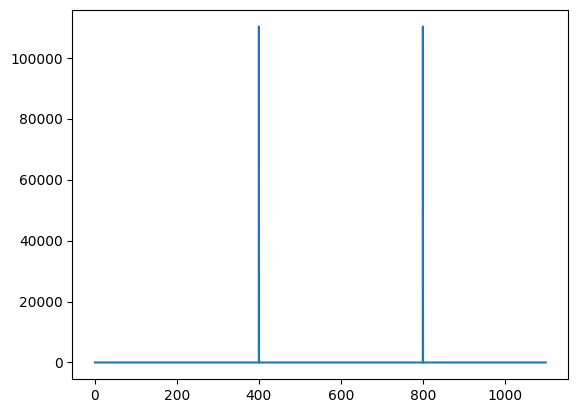

Assim como vimos em sala de aula, essa abordagem ilustra o processo de demodulação por frequência, fundamental no modelo de transmissão FDM (Frequency Division Multiplexing).

Já a função `frequency_to_bit` interpreta a frequência detectada como um bit binário, comparando-a com um limiar: se for superior ao valor definido, retorna `'1'`; caso contrário, `'0'`. Esse processo simula uma decodificação simples de sinais FDM com base na presença de faixas de frequência distintas.


🔧 **Observação**: valores como `SAMPLE_RATE` e o `threshold` devem estar de acordo com as frequências utilizadas (ja configurados no inicio do notebook) durante a modulação para garantir a correta detecção dos dados transmitidos.

In [15]:
def detect_frequency(audio_segment, sample_rate=SAMPLE_RATE):
    """
    Detecta a frequência dominante em um segmento de áudio
    
    Args:
        audio_segment: Segmento de áudio
        sample_rate: Taxa de amostragem
    
    Returns:
        float: Frequência detectada
    """
    # FFT para análise espectral
    fft = np.fft.fft(audio_segment)
    freqs = np.fft.fftfreq(len(fft), 1/sample_rate)
    
    # Considera apenas frequências positivas
    magnitude = np.abs(fft[:len(fft)//2])
    freqs_positive = freqs[:len(freqs)//2]
    
    # Encontra o pico de frequência
    peak_idx = np.argmax(magnitude)
    detected_freq = abs(freqs_positive[peak_idx])
    
    return detected_freq

def frequency_to_bit(frequency, threshold=660):
    """
    Converte frequência detectada em bit
    
    Args:
        frequency: Frequência detectada
        threshold: Limiar para decisão (média entre FREQ_LOW e FREQ_HIGH)
    
    Returns:
        str: '0' ou '1'
    """
    return '1' if frequency > threshold else '0'

#### Decoders

In [16]:
def decode_nrz(audio_signal, num_bits, sample_rate=SAMPLE_RATE,debug=False):
    """
    Decodifica sinal NRZ
    
    Args:
        audio_signal: Sinal de áudio
        num_bits: Número esperado de bits
        sample_rate: Taxa de amostragem
    
    Returns:
        str: Bits decodificados
    """
    samples_per_bit = int(sample_rate * BIT_DURATION)
    decoded_bits = ""
    
    show("Decodificando NRZ:",debug)
    
    for i in range(num_bits):
        start_idx = i * samples_per_bit
        end_idx = start_idx + samples_per_bit
        
        if end_idx > len(audio_signal):
            show(f"Aviso: Áudio muito curto para {num_bits} bits",debug)
            break
        
        # Analisa o meio do bit para evitar transições
        mid_start = start_idx + samples_per_bit // 4
        mid_end = end_idx - samples_per_bit // 4
        segment = audio_signal[mid_start:mid_end]
        
        freq = detect_frequency(segment, sample_rate)
        bit = frequency_to_bit(freq)
        decoded_bits += bit
        
        show(f"Bit {i}: freq={freq:.1f}Hz -> '{bit}'",debug)
    
    return decoded_bits

In [17]:
def decode_nrzi(audio_signal, num_bits, sample_rate=SAMPLE_RATE,debug=False):
    """
    Decodifica sinal NRZI
    """

    pass
    
    return '0'

In [18]:
def decode_manchester(audio_signal, num_bits, sample_rate=SAMPLE_RATE,debug=False):
    """
    Decodifica sinal Manchester
    """
    samples_per_bit = int(sample_rate * BIT_DURATION)
    decoded_bits = ""
    
    show("Decodificando Manchester:",debug)
    
    for i in range(num_bits):
        start_idx = i * samples_per_bit
        end_idx = start_idx + samples_per_bit
        
        if end_idx > len(audio_signal):
            break
        
        # Analisa primeira e segunda metade do bit
        mid_point = start_idx + samples_per_bit // 2
        
        # Primeira metade
        first_half = audio_signal[start_idx + samples_per_bit//8 : mid_point - samples_per_bit//8]
        freq1 = detect_frequency(first_half, sample_rate)
        state1 = frequency_to_bit(freq1)
        
        # Segunda metade
        second_half = audio_signal[mid_point + samples_per_bit//8 : end_idx - samples_per_bit//8]
        freq2 = detect_frequency(second_half, sample_rate)
        state2 = frequency_to_bit(freq2)
        
        # Determina o bit baseado na transição
        if state1 == '1' and state2 == '0': # Alto -> Baixo
            bit = '1'  
            show(f"Bit {i}: {freq1:.1f}Hz -> {freq2:.1f}Hz = alto->baixo = '1'",debug)
        elif state1 == '0' and state2 == '1': # Baixo -> Alto
            bit = '0'  
            show(f"Bit {i}: {freq1:.1f}Hz -> {freq2:.1f}Hz = baixo->alto = '0'",debug)
        else: # Erro de decodificação
            bit = '?'  
            show(f"Bit {i}: {freq1:.1f}Hz -> {freq2:.1f}Hz = ERRO na transição",debug)
        
        decoded_bits += bit
    
    return decoded_bits

## O Laboratório

In [19]:
##
## configuracoes do audio (detalhes na secção de setup)
##
# output_device = 10
# input_device = 7
output_device = 3
input_device = 1
sd.default.device = (input_device, output_device)

##
## Configurações globais do exercio
##
SAMPLE_RATE = 44100  # Taxa de amostragem do audio
BIT_DURATION = 1.0   # 1 segundo por bit
FREQ_LOW = 440       # bit '0' (Lá)
FREQ_HIGH = 880      # bit '1' (Lá oitava)

### Etapa 1: Compreendendo com a Codificação/Modulação de dados

Nessa seção você deve se familiariazar com algumas das funações de codificação (modulação) vista em sala de aula

In [20]:
test_bits = "11001"
print(f"Dados originais: {test_bits}\n")

Dados originais: 11001



In [21]:
# Testa cada modulação
print("1. NRZ:")
nrz_signal = encode_nrz(test_bits,debug=True)

print("\n3. Manchester:")
manchester_signal = encode_manchester(test_bits,debug=True)

1. NRZ:
Codificando NRZ: 11001
Bit 0: '1' -> 880 Hz
Bit 1: '1' -> 880 Hz
Bit 2: '0' -> 440 Hz
Bit 3: '0' -> 440 Hz
Bit 4: '1' -> 880 Hz

3. Manchester:
Codificando Manchester: 11001
Bit 0: '1' -> 880Hz -> 440Hz
Bit 1: '1' -> 880Hz -> 440Hz
Bit 2: '0' -> 440Hz -> 880Hz
Bit 3: '0' -> 440Hz -> 880Hz
Bit 4: '1' -> 880Hz -> 440Hz


**Escutando os dados** como a nossa proposta é utilizar notas músicais (som) para representar `0` e `1`. Vamos escutalos.

In [28]:
sd.play(manchester_signal, SAMPLE_RATE)
sd.wait()

In [23]:
sd.play(nrz_signal, SAMPLE_RATE)
sd.wait()

Você pode visualizar a modulação utilizando plots, com abaixo

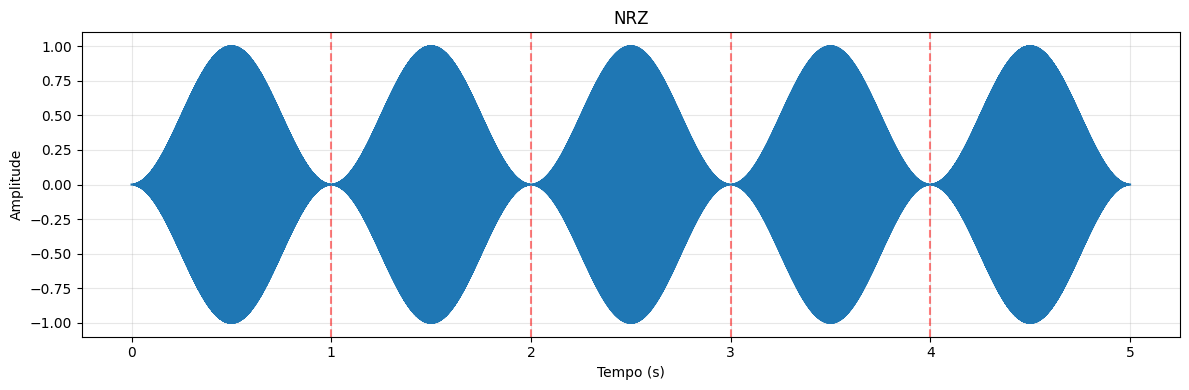

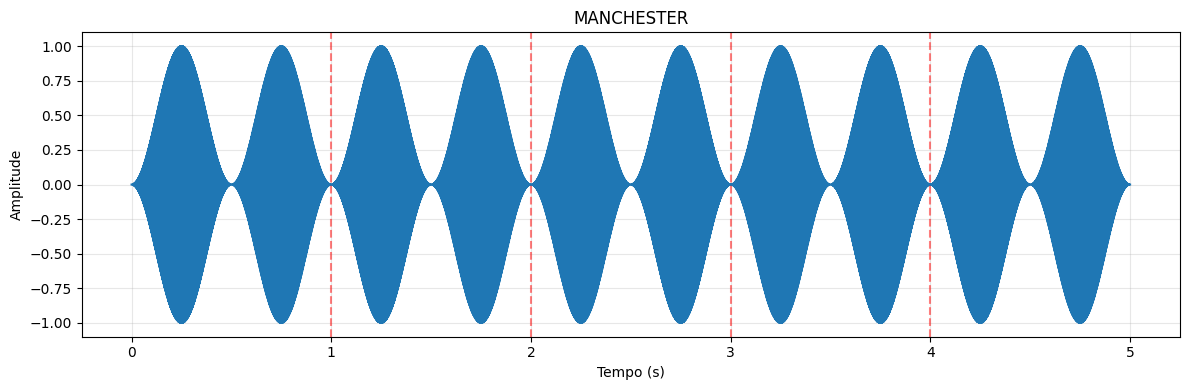

In [30]:
plot_signal(nrz_signal,'NRZ',len(test_bits))
plot_signal(manchester_signal,'MANCHESTER',len(test_bits))

##### Esse modulação foi utilizada nos primórdios da internet (internet discada)

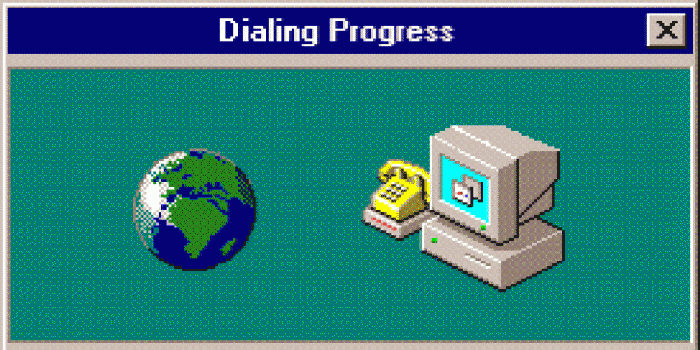

A internet discada utilizava modulação analógica para transportar dados digitais pela linha telefônica. Nos primeiros modems — como os que seguiram o padrão Bell 103 — a técnica predominante foi a Frequency Shift Keying (FSK), onde duas frequências distintas (uma para o bit 0 e outra para o bit 1) eram usadas para representar os dados.

Para quem não teve a oportunidade de utilizar a internet discada o video abaixo ilustra bem o processo de modulação utilizada

<iframe width="560" height="315" src="https://www.youtube.com/embed/ofVEEWObx_I?si=VzAD8hgPPeyXFSRn" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### Etapa 2: Decodificação

Nesta etapa vocês irão  recuperar os dados originais a partir do sinal de áudio recebido. Este é o papel do receptor em um sistema de comunicação.

O promeiro passo para a decodificação (demodulação) em um mundo ideal é salvar o resultado da modulação em um arquivo de audio (.wav)

In [31]:
# Dados de teste
test_data = "1010100000001111110000010101010111000"

print(f"Criando arquivos de teste para: {test_data}")

# NRZ
nrz_signal = encode_nrz(test_data)
sf.write('teste_nrz.wav', nrz_signal, SAMPLE_RATE)
print("\t ✓ Arquivo teste_nrz.wav criado")

# Manchester
manchester_signal = encode_manchester(test_data)
sf.write('teste_manchester.wav', manchester_signal, SAMPLE_RATE)
print("\t ✓ Arquivo teste_manchester.wav criado")


Criando arquivos de teste para: 1010100000001111110000010101010111000
	 ✓ Arquivo teste_nrz.wav criado
	 ✓ Arquivo teste_manchester.wav criado


In [32]:
original_data = test_data

print(f"\nDados originais: {original_data}")
print(f"Número de bits: {len(original_data)}\n")


Dados originais: 1010100000001111110000010101010111000
Número de bits: 37



Para evitar efeitos de atenuação e interferencias vamos realizar a decodificação diretamente do arquivo de audio.

In [33]:
# Testa decodificação NRZ
print("1. Decodificando NRZ:")
nrz_audio, _ = sf.read('teste_nrz.wav')
decoded_nrz = decode_nrz(nrz_audio, len(original_data))
print(f"Original: {original_data}")
print(f"Decodificado: {decoded_nrz}")
print(f"Correto: {original_data == decoded_nrz}\n")

1. Decodificando NRZ:
Original: 1010100000001111110000010101010111000
Decodificado: 1010100000001111110000010101010111000
Correto: True



In [34]:
# Testa decodificação Manchester
print("3. Decodificando Manchester:")
manchester_audio, _ = sf.read('teste_manchester.wav')
decoded_manchester = decode_manchester(manchester_audio, len(original_data))
print(f"Original: {original_data}")
print(f"Decodificado: {decoded_manchester}")
print(f"Correto: {original_data == decoded_manchester}")

3. Decodificando Manchester:
Original: 1010100000001111110000010101010111000
Decodificado: 1010100000001111110000010101010111000
Correto: True


### -> Resposta Etapa 2:

In [42]:
my_file = "dados_codificados/dados_123110825_44100hz.wav"

# Colher a quantidade de bits do áudio
audio, sr = sf.read("dados_codificados/dados_123110825_44100hz.wav")
duration = len(audio) / sr

num_bits = int(duration / BIT_DURATION)
print(f"A quantidade de bits do áudio: {num_bits}")

print("\n--------------------------\n")

# Testa decodificação NRZ
print("1. Decodificando NRZ:")
nrz_audio_msg, _ = sf.read(my_file)
decoded_nrz_msg = decode_nrz(nrz_audio_msg, num_bits)
print(f"Decodificado: {decoded_nrz_msg}")
print(f"Número de bits: {len(decoded_nrz_msg)}")

print("\n--------------------------\n")

# Testa decodificação Manchester
print("3. Decodificando Manchester:")
manchester_audio_msg, _ = sf.read(my_file)
decoded_manchester_msg = decode_manchester(manchester_audio_msg, num_bits)
print(f"Decodificado: {decoded_manchester_msg}")
print(f"Número de bits: {len(decoded_manchester_msg)}")

A quantidade de bits do áudio: 20

--------------------------

1. Decodificando NRZ:
Decodificado: 10000111010100011001
Número de bits: 20

--------------------------

3. Decodificando Manchester:
Decodificado: ????????????????????
Número de bits: 20


Portanto, a decodificação ocorreu com sucesso, utilizando a modulação NRZ, com 20 bits e a mensagem decodificada foi: 10000111010100011001

### Etapa 3: Impacto do Ruído na Comunicação

Simulação de decodificação em condições adversas, o metodo abaixo simula a adição de ruído ao sinal.

In [46]:
def adicionar_ruido(audio_signal, snr_db=-12):
    """
    Adiciona ruído gaussiano ao sinal
    
    Args:
        audio_signal: Sinal original
        snr_db: Relação sinal-ruído em dB
    
    Returns:
        array: Sinal com ruído
    """
    # Calcula potência do sinal
    signal_power = np.mean(audio_signal ** 2)
    
    # Calcula potência do ruído baseada no SNR
    snr_linear = 10 ** (snr_db / 10)
    noise_power = signal_power / snr_linear
    
    # Gera ruído gaussiano
    noise = np.random.normal(0, np.sqrt(noise_power), len(audio_signal))
    
    return audio_signal + noise

Para adicionar ruido utilize um valor **negativo** no `snr_db`. Por exemplo se você quiser um ruido de 3db utilize `snr_db=-3` no metodo.

A baixo veja a menssagem original

In [47]:
original_bits = "00111000"

In [ ]:
snr=-3 # A partir de 33dB de ruído (-33), a mensagem é afetada, e a decodificação ocorre com falha

clean_signal = encode_nrz(original_bits)

noisy_signal = adicionar_ruido(clean_signal, snr)
decoded = decode_nrz(noisy_signal, len(original_bits))
print(f"  Original: {original_bits}")
print(f"  Decodificado: {decoded}")
print(f"  Correto: {original_bits == decoded}\n")

  Original: 00111000
  Decodificado: 00111000
  Correto: True



### -> Resposta Etapa 3:

Adicionando ruído manualmente a mensagem da Etapa 2

In [68]:
original_bits = decoded_nrz_msg

snr=-3 # A partir de 32dB de ruído (-32), a mensagem é afetada

clean_signal = encode_nrz(original_bits)

noisy_signal = adicionar_ruido(clean_signal, snr)
decoded = decode_nrz(noisy_signal, len(original_bits))
print(f"  Original: {original_bits}")
print(f"  Decodificado: {decoded}")
print(f"  Correto: {original_bits == decoded}\n")

  Original: 10000111010100011001
  Decodificado: 10000111010100011001
  Correto: True



Abaixo, segue as funções que adicionam ruídos com diferentes valores de SNR, dado um intervalo fixo de:  $[-40, 0]$

In [93]:
# -------------------------------------------------------
# Conta erros entre bits transmitidos e bits decodificados
# -------------------------------------------------------
def contar_erros(original, decodificado): 
    return sum(1 for o, d in zip(original, decodificado) if o != d)

# -------------------------------------------------------
# Roda o teste para uma modulação específica
# Requer:
#  - encode_func(bits)  → retorna áudio
#  - decode_func(audio) → retorna bits
#  - adicionar_ruido(audio, snr_db)
# -------------------------------------------------------
def testar_modulacao(bits, encode_func, decode_func, snr_range):
    erros = []

    total_bits = len(bits)

    sinal_limpo = encode_func(bits)

    for snr in snr_range:
        # Aplicar ruído
        sinal_ruidoso = adicionar_ruido(sinal_limpo, snr)

        # Decodificação através da modulação passada como argumento
        bits_recebidos = decode_func(sinal_ruidoso, total_bits)  

        # Contabilização dos erros
        erros.append(contar_erros(bits, bits_recebidos))

    return erros

Após configuração das funções auxiliares, iremos executar os testes e plotar dois gráficos, referentes ao uso da modulação NRZ e Manchester, e contabilizar o primeiro erro e o limiar para todos os bits errados em ambas modulações.

In [94]:
# Mensagem da Etapa 2
bits = "10000111010100011001"

# Range de SNR
snr_range = list(range(-20, -50, -1))   # -20, -21, -22, ..., -100 dB

total_bits = len(bits)

# ---------------------
# Teste para NRZ
# ---------------------
erros_nrz = testar_modulacao(bits, encode_nrz, decode_nrz, snr_range)

# ---------------------
# Teste para Manchester
# ---------------------
erros_manch = testar_modulacao(bits, encode_manchester, decode_manchester, snr_range)

Plotagem dos dois gráficos:

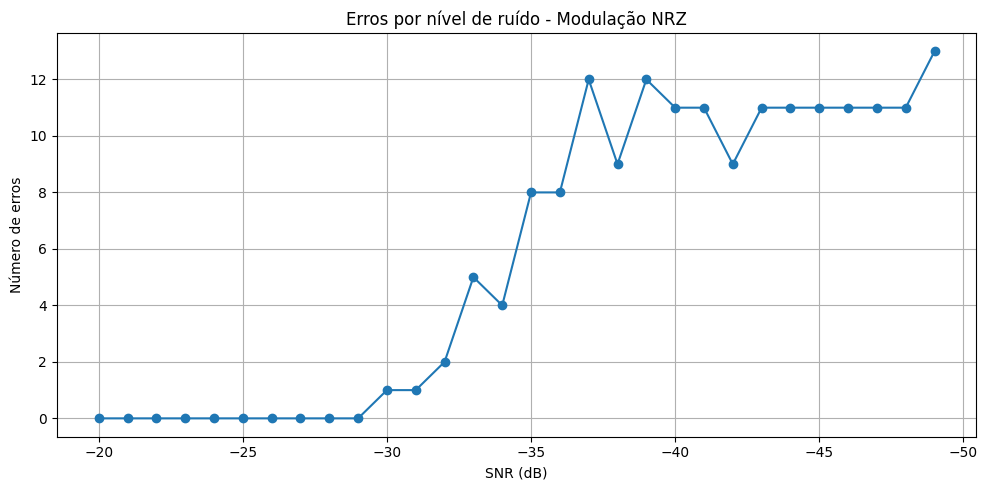

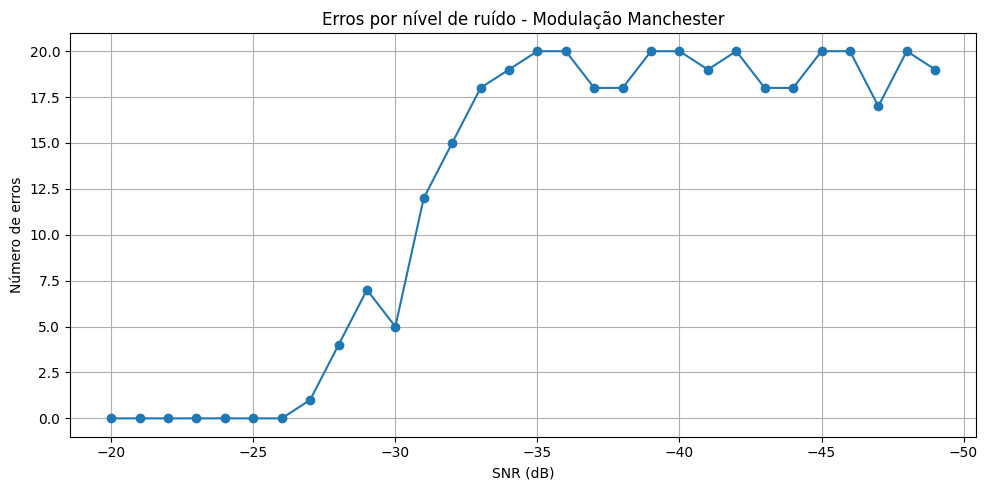

In [95]:
# NRZ
plt.figure(figsize=(10, 5))
plt.plot(snr_range, erros_nrz, marker="o")
plt.gca().invert_xaxis() 
plt.xlabel("SNR (dB)")
plt.ylabel("Número de erros")
plt.title("Erros por nível de ruído - Modulação NRZ")
plt.tight_layout()
plt.grid(True)

plt.savefig("erros_modulacao_nrz.png", dpi=300)
plt.show()

# Manchester
plt.figure(figsize=(10, 5))
plt.plot(snr_range, erros_manch, marker="o")
plt.gca().invert_xaxis() 
plt.xlabel("SNR (dB)")
plt.ylabel("Número de erros")
plt.title("Erros por nível de ruído - Modulação Manchester")
plt.tight_layout()
plt.grid(True)

plt.savefig("erros_modulacao_manchester.png", dpi=300)
plt.show()

Realizando um pequeno teste, podemos identificar em qual valor do SNR, o primeiro bit e todos são comprometidos.

In [112]:
# NRZ
snr=[-32, -37]

clean_signal = encode_nrz(original_bits)

for snr_value in snr:
    noisy_signal = adicionar_ruido(clean_signal, snr_value)
    decoded = decode_nrz(noisy_signal, len(original_bits))
    print(f"  Original: {original_bits}")
    print(f"  Decodificado: {decoded}")
    print(f"  Correto: {original_bits == decoded}\n")

print(f"A partir de {snr[0]} os primeiros bits são comprometidos")
print(f"A partir de {snr[1]} TODOS os bits são comprometidos")

  Original: 10000111010100011001
  Decodificado: 11001111010110011101
  Correto: False

  Original: 10000111010100011001
  Decodificado: 11111111111111111111
  Correto: False

A partir de -32 os primeiros bits são comprometidos
A partir de -37 TODOS os bits são comprometidos


In [125]:
# Manchester
snr=[-27, -40]

clean_signal = encode_manchester(original_bits)

for snr_value in snr:
    noisy_signal = adicionar_ruido(clean_signal, snr_value)
    decoded = decode_manchester(noisy_signal, len(original_bits))
    print(f"  Original: {original_bits}")
    print(f"  Decodificado: {decoded}")
    print(f"  Correto: {original_bits == decoded}\n")

print(f"A partir de {snr[0]} os primeiros bits são comprometidos")
print(f"A partir de {snr[1]} TODOS os bits são comprometidos")

  Original: 10000111010100011001
  Decodificado: 10000111010?00011001
  Correto: False

  Original: 10000111010100011001
  Decodificado: ????????????????????
  Correto: False

A partir de -27 os primeiros bits são comprometidos
A partir de -40 TODOS os bits são comprometidos


### Etapa 4: Decodificação no mundo real

In [43]:
def capturar_do_microfone(duracao_segundos):
    """
    Captura áudio do microfone
    
    Args:
        duracao_segundos: Duração da captura
    
    Returns:
        array: Áudio capturado
    """
    print(f"Iniciando captura por {duracao_segundos} segundos...")
    print("Reproduza o áudio no seu celular AGORA!")
    
    # Captura áudio
    audio_capturado = sd.rec(
        int(duracao_segundos * SAMPLE_RATE), 
        samplerate=SAMPLE_RATE, 
        channels=1
    )
    sd.wait()  # Aguarda terminar a captura
    
    print("Captura concluída!")
    return audio_capturado.flatten()

Para este exercício, você deverá utilizar um **segundo dispositivo**, como por exemplo, seu **celular**.

1. Copie o arquivo de áudio [dados_ar.wav](./dados_ar.wav) para o segundo dispositivo.
2. Este áudio contém uma **mensagem de 5 bits**, codificada utilizando o esquema **Manchester**.
3. O desafio consiste em **decodificar essa mensagem utilizando apenas o microfone do seu computador**.  
   **Não abra o arquivo diretamente** no computador — apenas reproduza o áudio no segundo dispositivo.

> 🧪 Certifique-se de que os [procedimentos de configuração](#setup) foram seguidos corretamente e que o microfone do seu computador está funcionando adequadamente.

Por fim, **execute o código abaixo** (referente à etapa de escuta por microfone) e reproduza o áudio no segundo dispositivo para tentar decodificar a mensagem.

In [45]:
# test_data = "10110"
# Captura áudio

duracao = 5 * BIT_DURATION + 1  # +1 segundo de margem
audio_capturado = capturar_do_microfone(duracao)

# Salva captura para análise
sf.write('captura_microfone.wav', audio_capturado, SAMPLE_RATE)

# Tenta decodificar
print("\nTentando decodificar...")
decoded = decode_manchester(audio_capturado, 5)

print(f"Original: ?????")
print(f"Capturado: {decoded}")

Iniciando captura por 6.0 segundos...
Reproduza o áudio no seu celular AGORA!
Captura concluída!

Tentando decodificar...
Original: ?????
Capturado: 10110
